### Import required packages

In [3]:
# Import our necessary toolboxes and tell matplotlib to plot inline
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print('Packages imported!')

Packages imported!


### Create our two signals

> **Task**: Choose two different frequencies to plot. I'd recommend choosing one between 5-20, and a second between 100-150.

In [21]:
sampling_freq = 1024 # Sampling frequency
duration = 0.3 # 0.3 seconds of signal

# Choose your frequencies below
freq1 = 5 
freq2 = 100

# Generate a time vector
time_vector = np.arange(0, duration, 1/sampling_freq)

# Generate sine waves at the given frequencies
signal_1 = np.sin(2 * np.pi * freq1 * time_vector)     # Generate a sine wave
signal_2 = np.sin(2 * np.pi * freq2 * time_vector) * 2 # Generate another sine wave, with double the power

print('Sine waves generated.')

Sine waves generated.


### Plot the frequencies

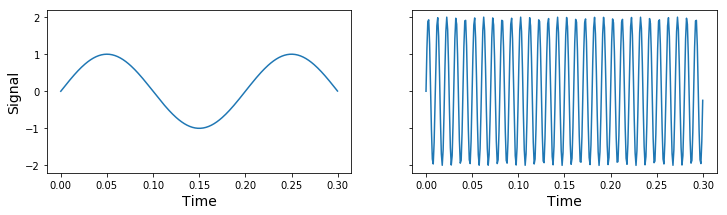

In [22]:
fig,ax = plt.subplots(1,2,figsize=(12,3),sharey=True)

ax[0].plot(time_vector,signal_1)
ax[1].plot(time_vector,signal_2)

ax[0].set_ylabel('Signal',fontsize=14)
ax[0].set_xlabel('Time',fontsize=14)
ax[1].set_xlabel('Time',fontsize=14)

plt.show()

### Combine the signals

> **Task**: Write a line of code below that adds `signal_1` and `signal_2` and assigns it to a variable called `combined_signal`. Print `combined_signal`.

In [16]:
# Add the signals we created above into one signal
combined_signal = signal_1 + signal_2

### Plot the combined signal

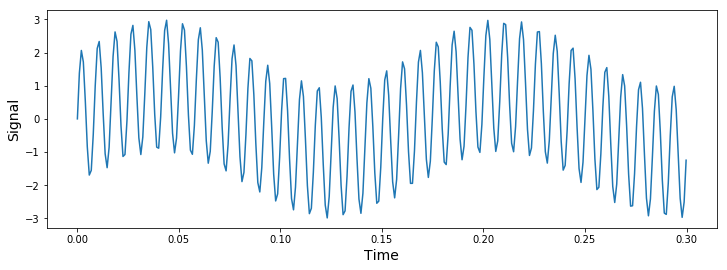

In [23]:
fig = plt.figure(figsize=(12, 4))
plt.plot(time_vector,combined_signal)
plt.ylabel('Signal',fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.show()

Below, we'll calculate the **Fourier Transform**, which will determine the frequencies that are in our sample. We'll implement this with [**Welch's Method**](https://en.wikipedia.org/wiki/Welch%27s_method), which consists in averaging consecutive Fourier transform of small windows of the signal, with or without overlapping. Basically, we calculate the fourier transform of a signal across a few sliding windows, and then calculate the mean PSD from all the sliding windows.

The `freqs` vector contains the x-axis (frequency bins) and the `psd` vector contains the y-axis values (power spectral density). The units of the power spectral density, when working with EEG data, is usually $\mu$V^2 per Hz.

/Users/ashley/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 4096 is greater than input length  = 308, using nperseg = 308
  .format(nperseg, input_length))


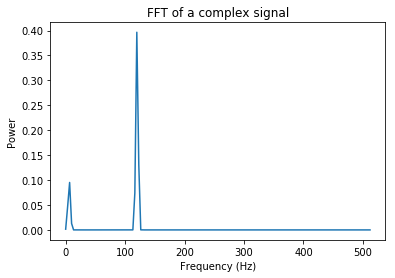

In [24]:
# Import our signal processing package
from scipy import signal

# Define sliding window length (4 seconds, which will give us 2 full cycles at 0.5 Hz)
win = 4 * sampling_freq
freqs, psd = signal.welch(combined_signal, sampling_freq, nperseg=win)

# Plot our data
plt.plot(freqs,psd) # Plot a select range of frequencies
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of a complex signal')
plt.show()

### Additional resources

If you'd like to play with more properties of EEG signals, see [this tutorial](https://www.geogebra.org/m/BOMfKCIK).